Сonnection of libraries for creating a neural network architecture (tensorflow), processing data arrays (numpy) and visualization (matplotlib).

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

2021-12-22 22:18:41.461034: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 22:18:41.461055: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Creation of neural network architecture. 3 convolution stages.

In [3]:
np.random.seed(1)
shape=(480,750)

model = Sequential()
model.add(Conv2D(20, (3, 3), padding='same', input_shape=(480,750, 3), activation='relu'))
model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(40, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(40, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(100, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(100, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Flatten())

#model.add(Dense(600, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 480, 750, 20)      560       
                                                                 
 conv2d_1 (Conv2D)           (None, 480, 750, 20)      3620      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 160, 250, 20)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 160, 250, 40)      7240      
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 250, 40)      14440     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 83, 40)       0         
 2D)                                                    

2021-12-22 22:18:44.776681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-22 22:18:44.777020: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 22:18:44.777059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-22 22:18:44.777094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-22 22:18:44.777129: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [4]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['binary_accuracy'])

Loading data for neural network training and testing.

In [5]:
datagen=ImageDataGenerator(rescale=1/255)

train_dir = '/home/dimasik/pneumonia/chest_xray/train'
train_generator=datagen.flow_from_directory(train_dir,target_size=shape, batch_size=50, class_mode='binary')  

test_dir= "/home/dimasik/pneumonia/chest_xray/test"
test_generator=datagen.flow_from_directory(test_dir, target_size=shape, batch_size=10, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=100,
    shuffle=True,
    verbose=1)

/tmp/ipykernel_35935/3300642133.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/100


2021-12-22 22:19:33.500953: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
2021-12-22 22:19:33.853571: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
2021-12-22 22:19:38.322742: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.
2021-12-22 22:19:39.217585: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.


1/5 [=====>........................] - ETA: 57s - loss: 0.7006 - binary_accuracy: 0.1400

2021-12-22 22:19:47.048930: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1440000000 exceeds 10% of free system memory.


5/5 [==============================] - 69s 14s/step - loss: 0.6918 - binary_accuracy: 0.5400
Epoch 2/100
5/5 [==============================] - 69s 14s/step - loss: 0.6772 - binary_accuracy: 0.7680
Epoch 3/100
5/5 [==============================] - 60s 11s/step - loss: 0.6651 - binary_accuracy: 0.7593
Epoch 4/100
5/5 [==============================] - 69s 14s/step - loss: 0.6664 - binary_accuracy: 0.6760
Epoch 5/100
5/5 [==============================] - 69s 14s/step - loss: 0.6362 - binary_accuracy: 0.7640
Epoch 6/100
5/5 [==============================] - 69s 14s/step - loss: 0.6074 - binary_accuracy: 0.7720
Epoch 7/100
5/5 [==============================] - 69s 14s/step - loss: 0.6007 - binary_accuracy: 0.7360
Epoch 8/100
5/5 [==============================] - 69s 14s/step - loss: 0.5987 - binary_accuracy: 0.7280
Epoch 9/100
5/5 [==============================] - 69s 14s/step - loss: 0.6212 - binary_accuracy: 0.6920
Epoch 10/100
5/5 [==============================] - 69s 14s/step - 

In [7]:
var1 = model.evaluate_generator(test_generator, steps=100,verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(var1[1] * 100, 4))

/tmp/ipykernel_35935/3226677181.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  var1 = model.evaluate_generator(test_generator, steps=100,verbose=1)


100/100 [==============================] - 23s 227ms/step - loss: 0.8171 - binary_accuracy: 0.7404
Доля верных ответов на тестовых данных, в процентах: 74.0385


Testing and visualization of the results of the neural network with the data of one patient.

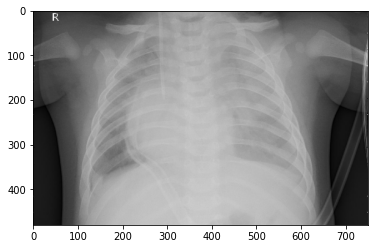

In [8]:
img_path = '/home/dimasik/pneumonia/chest_xray/test/PNEUMONIA/person152_bacteria_721.jpeg'
img = image.load_img(img_path, target_size =(480,750), color_mode = "rgb")

plt.imshow(img.convert('RGBA'))
plt.show()

In [9]:
arrImg = image.img_to_array(img)
arrImg = arrImg.reshape(1,480,750,3)
arrImg /= 255
# print(arrImg)

Registration of pneumonia by x-ray image. Result 0 - pneumonia.

In [10]:
prediction = model.predict(arrImg)
print("Результат с выхода сети: ", np.argmax(prediction[0]))

Результат с выхода сети:  0
